In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
# 그래프 예쁘게 그리는 설정
from matplotlib import rcParams, cycler 
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator 
rcParams['font.family'] = 'sans-serif' 
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 16 
rcParams['axes.linewidth'] = 1.1 
rcParams['axes.labelpad'] = 10.0 
rcParams['axes.xmargin'] = 0 
rcParams['axes.ymargin'] = 0 
rcParams.update({
    "figure.figsize" : (8.4,4.8), "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946, "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965, "axes.autolimit_mode" : "round_numbers", "xtick.major.size" : 7, "xtick.minor.size" : 3.5, "xtick.major.width" : 1.1, "xtick.minor.width" : 1.1, "xtick.major.pad" : 5, "xtick.minor.visible" : True, "ytick.major.size" : 7, "ytick.minor.size" : 3.5, "ytick.major.width" : 1.1, "ytick.minor.width" : 1.1, "ytick.major.pad" : 5, "ytick.minor.visible" : True, "lines.markersize" : 10, "lines.markerfacecolor" : "none", "lines.markeredgewidth" : 0.8
    }) 

In [155]:
# 연도랑 월 리스트
years = [2017 + i for i in range(7)]
periods = {
    2017: 'Before', 2018: 'Before', 2019: 'Before',
    2020: 'During', 2021: 'During', 2022: 'During',
    2023: 'After'
}
months = [3, 4, 5]

In [156]:
# 결측치 개수
for y in years:
    for m in months:
        raw = pd.read_csv(f'data\\{y}.{m}.csv')
        print(f'{y}.{m}: missing {raw["이산화질소"].isna().sum()} filling {raw["이산화질소"].notna().sum()} total {raw.shape[0]}')
    print()

2017.3: missing 51 filling 693 total 744
2017.4: missing 4 filling 716 total 720
2017.5: missing 5 filling 739 total 744

2018.3: missing 54 filling 690 total 744
2018.4: missing 5 filling 715 total 720
2018.5: missing 4 filling 740 total 744

2019.3: missing 32 filling 712 total 744
2019.4: missing 8 filling 712 total 720
2019.5: missing 6 filling 738 total 744

2020.3: missing 6 filling 738 total 744
2020.4: missing 4 filling 716 total 720
2020.5: missing 6 filling 738 total 744

2021.3: missing 5 filling 739 total 744
2021.4: missing 4 filling 716 total 720
2021.5: missing 4 filling 740 total 744

2022.3: missing 4 filling 740 total 744
2022.4: missing 4 filling 716 total 720
2022.5: missing 7 filling 737 total 744

2023.3: missing 4 filling 740 total 744
2023.4: missing 5 filling 715 total 720
2023.5: missing 4 filling 740 total 744



In [157]:
# 복잡하지만 앞에다가 연도랑 월, 기간 이름 달아주는 과정
whole_df = pd.DataFrame(np.zeros((1, 5)), columns=['date_time', 'year', 'hour', 'period', 'no2'])

for y in years:
    for m in months:
        raw = pd.read_csv(f'data\\{y}.{m}.csv')
        raw.columns = ['date_time', 'no2']
        raw = raw[raw['no2'].notna()]

        year_hour = pd.DataFrame(np.zeros((raw.shape[0], 4)), columns=['date_time', 'year', 'hour', 'period'], dtype=object)
        if y != 2023:
            divider = ' '
        else:
            divider = ':'
        for i in range(raw.shape[0]):
                year_hour.iloc[i, 0] = raw.iloc[i, 0]
                time = raw.iloc[i, 0].split(divider)
                year_hour.iloc[i, 1] = int(time[0][0:4])
                year_hour.iloc[i, 2] = int(time[1])
                year_hour.iloc[i, 3] = periods[y]

        raw = year_hour.merge(raw, how='inner', on='date_time')
        whole_df = pd.concat((whole_df, raw))

whole_df = whole_df.iloc[1:, 1:]
whole_df

,year,hour,period,no2
0,2017,1,Before,0.048
1,2017,2,Before,0.052
2,2017,3,Before,0.066
3,2017,4,Before,0.065
4,2017,5,Before,0.062
...,...,...,...,...
735,2023,5,After,0.011
736,2023,4,After,0.010
737,2023,3,After,0.011
738,2023,2,After,0.011


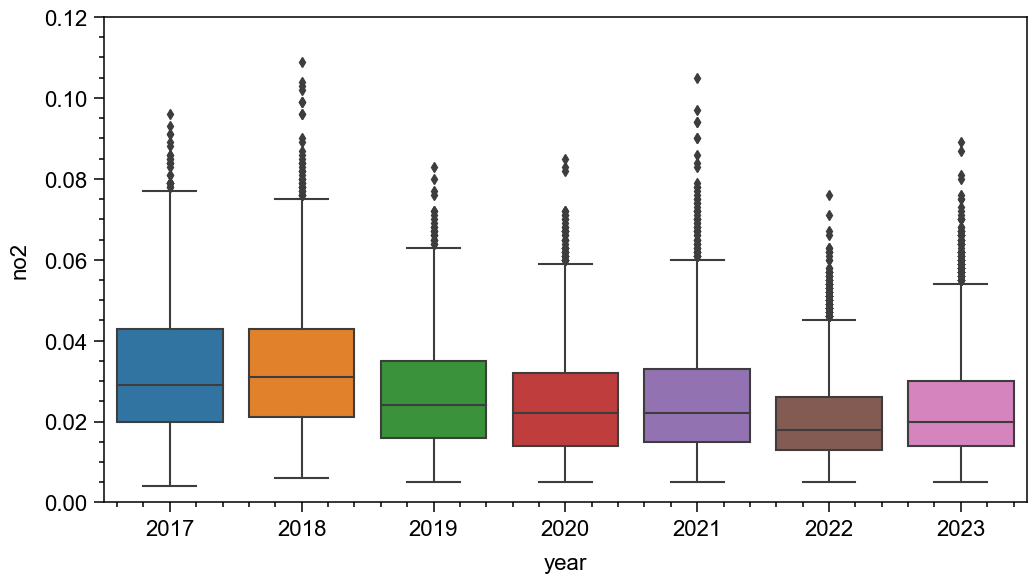

In [158]:
# 연도별로 그래프 그려봄
plt.figure(figsize=(12, 6))
sns.boxplot(x=whole_df['year'], y=whole_df['no2'])
plt.show()

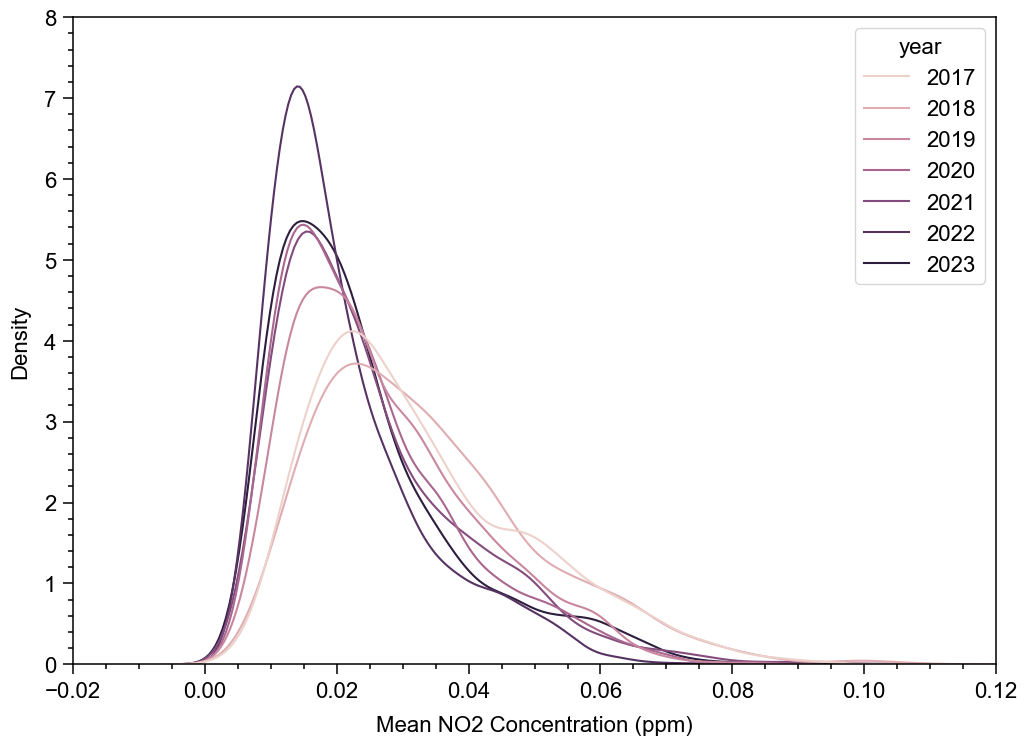

In [159]:
# 연도별로 kde 그려봄
plt.figure(figsize=(12, 8))
sns.kdeplot(whole_df, x='no2', hue='year')
plt.xlabel('Mean NO2 Concentration (ppm)')
plt.show()

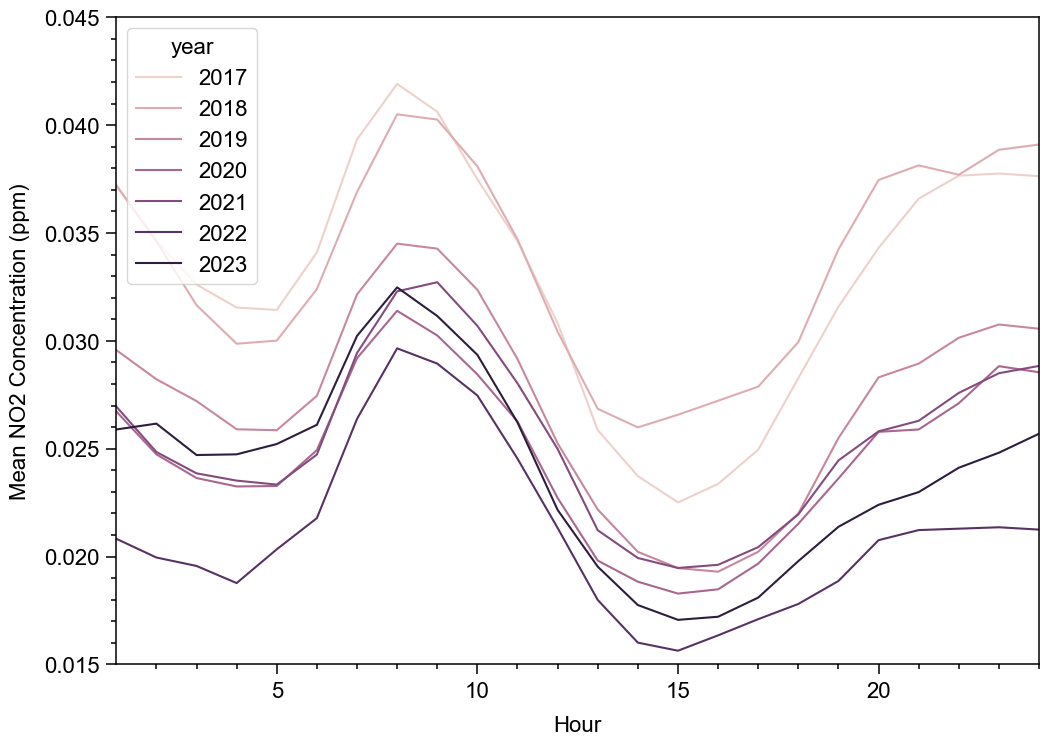

In [160]:
# 연도별로 일변동 그려봄
plt.figure(figsize=(12, 8))
sns.lineplot(whole_df, x='hour', y='no2', hue='year', errorbar=None)
plt.xlim(1, 24)
plt.xlabel('Hour')
plt.ylabel('Mean NO2 Concentration (ppm)')
plt.show()

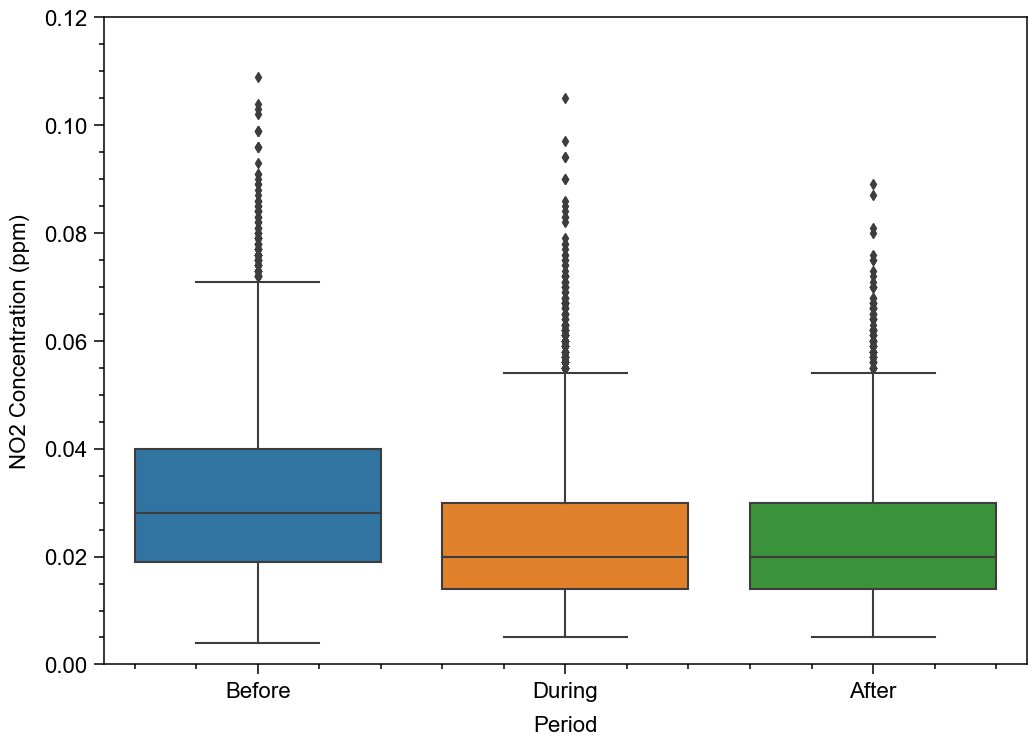

In [161]:
# 기간별 박스와 수염 그래프
plt.figure(figsize=(12, 8))
sns.boxplot(x=whole_df['period'], y=whole_df['no2'])
plt.xlabel('Period')
plt.ylabel('NO2 Concentration (ppm)')
plt.savefig('no2_by_period.png')
plt.show()

In [162]:
# 잠깐 넣은 정규화 함수
def normalize(x):
    return (x - x.mean()) / x.std()

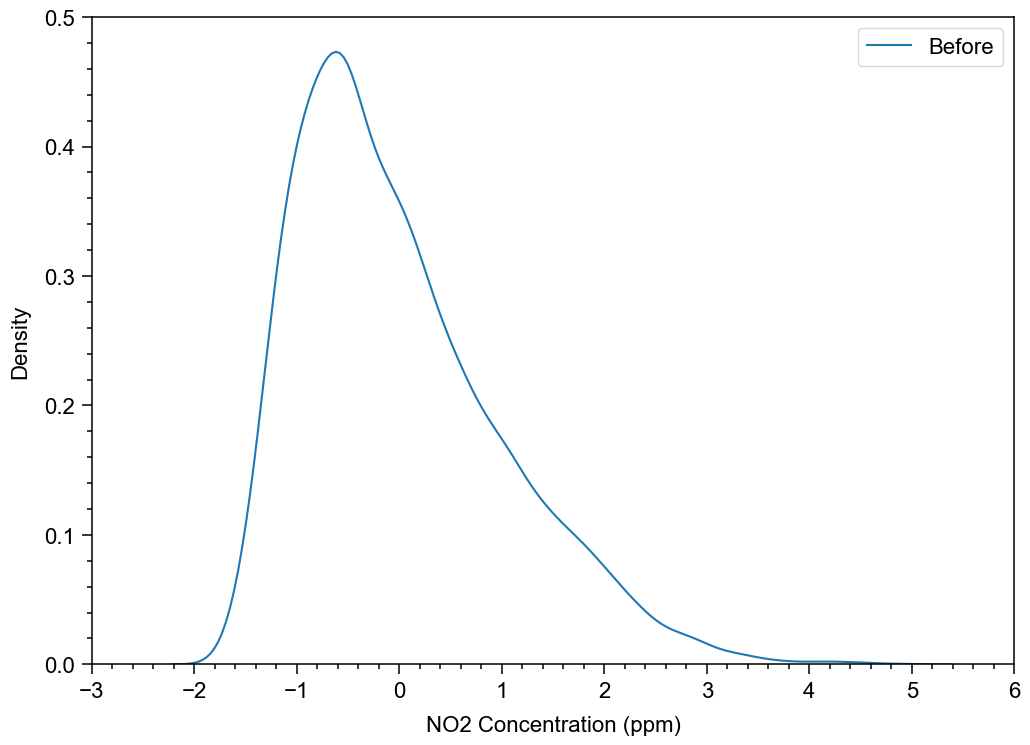

In [163]:
# 정규화 테스트
plt.figure(figsize=(12, 8))
sns.kdeplot(normalize(whole_df[whole_df['period'] == 'Before']['no2']), label='Before')

plt.legend()
plt.xlabel('NO2 Concentration (ppm)')
plt.show()

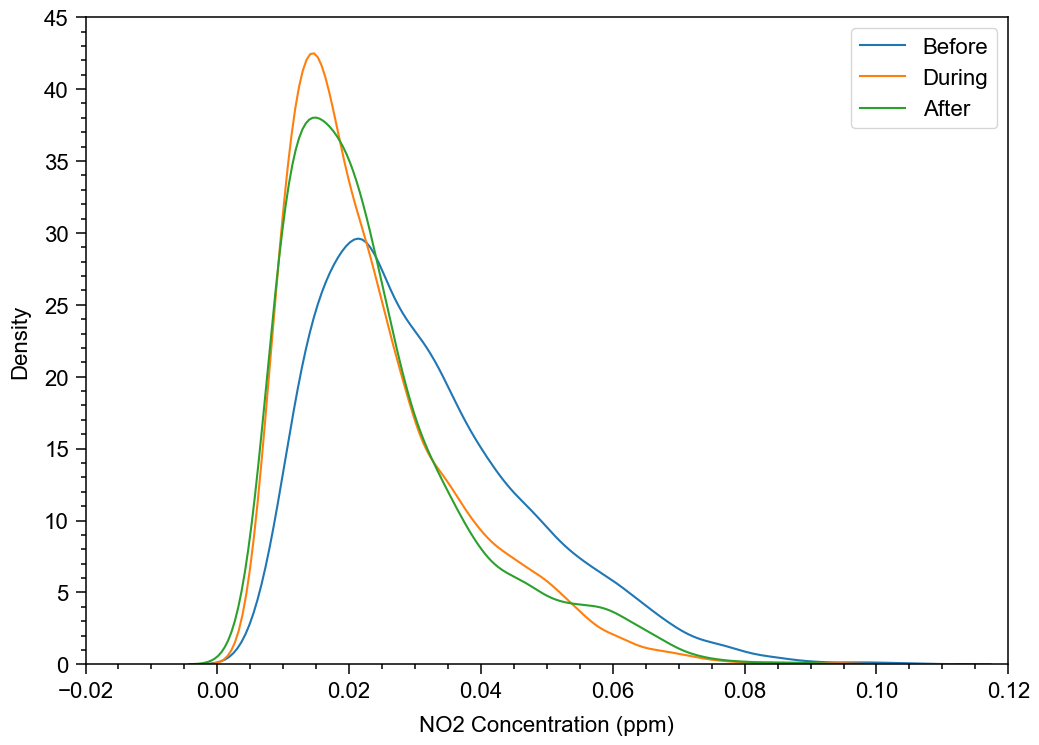

In [164]:
# 기간별 kde 그래프
plt.figure(figsize=(12, 8))
sns.kdeplot(whole_df[whole_df['period'] == 'Before']['no2'], label='Before')
sns.kdeplot(whole_df[whole_df['period'] == 'During']['no2'], label='During')
sns.kdeplot(whole_df[whole_df['period'] == 'After']['no2'], label='After')

plt.legend()
plt.xlabel('NO2 Concentration (ppm)')
plt.savefig('densityplot_by_period.png')
plt.show()

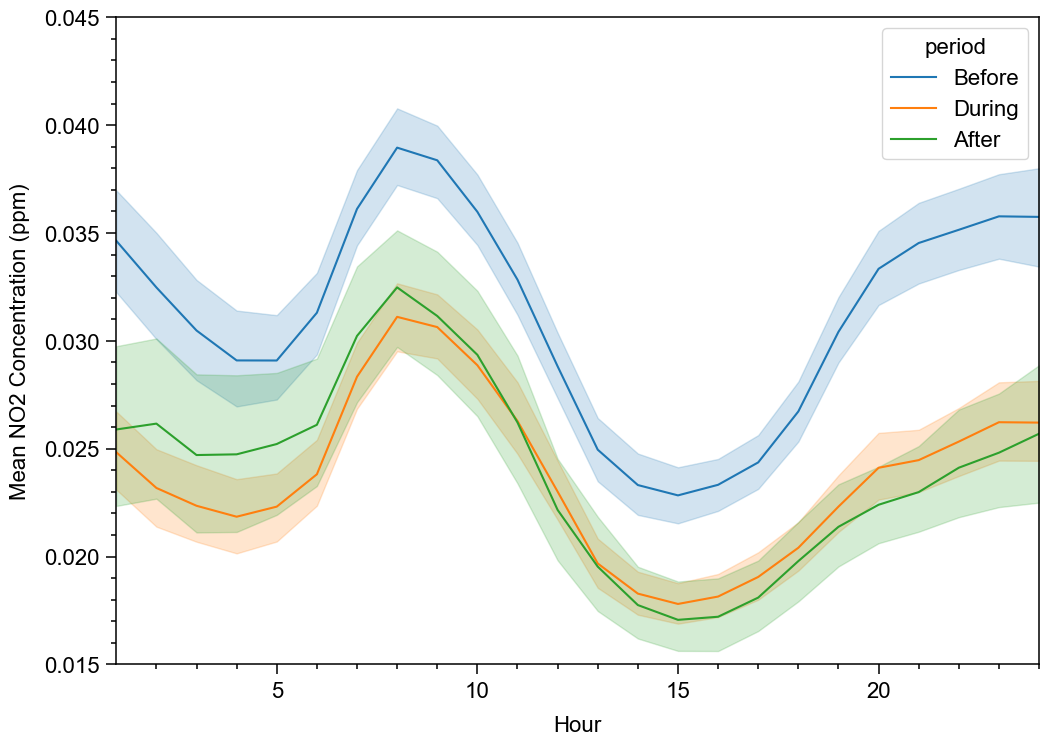

In [165]:
# 기간별 일평균 with 95% 신뢰구간
plt.figure(figsize=(12, 8))
sns.lineplot(whole_df, x='hour', y='no2', hue='period')
plt.xlim(1, 24)
plt.xlabel('Hour')
plt.ylabel('Mean NO2 Concentration (ppm)')
plt.savefig('daily no2 change.png')
plt.show()

In [166]:
# 대표값 등 분석
whole_df[whole_df['period'] == 'Before']['no2'].describe()

count    6455.000000
mean        0.031237
std         0.015985
min         0.004000
25%         0.019000
50%         0.028000
75%         0.040000
max         0.109000
Name: no2, dtype: float64

In [167]:
whole_df[whole_df['period'] == 'During']['no2'].describe()

count    6580.000000
mean        0.023725
std         0.013363
min         0.005000
25%         0.014000
50%         0.020000
75%         0.030000
max         0.105000
Name: no2, dtype: float64

In [168]:
whole_df[whole_df['period'] == 'After']['no2'].describe()

count    2195.000000
mean        0.024000
std         0.013983
min         0.005000
25%         0.014000
50%         0.020000
75%         0.030000
max         0.089000
Name: no2, dtype: float64

In [169]:
# 통계 두가자
import scipy as sp
from scipy import stats

periods_set = list(set(periods.values()))

In [170]:
def normalize(x):
    return (x - x.mean()) / x.std()

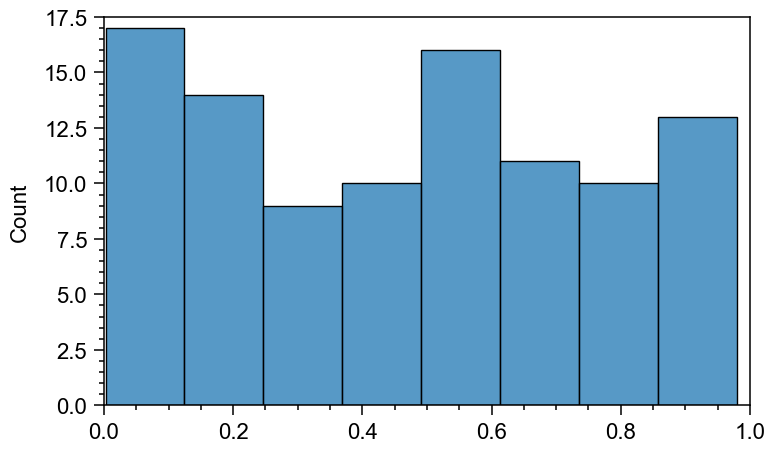

In [171]:
# kstest 검정용 (아레 셀 네개)
rng = np.random.default_rng()

sns.histplot(stats.uniform.rvs(size=100, random_state=rng))
plt.show()

In [172]:
print(sp.stats.kstest(
        stats.uniform.rvs(size=100, random_state=rng),
        'norm'
        ))

KstestResult(statistic=0.5007796137792482, pvalue=1.0151795478822758e-23, statistic_location=0.0019542031861756737, statistic_sign=-1)


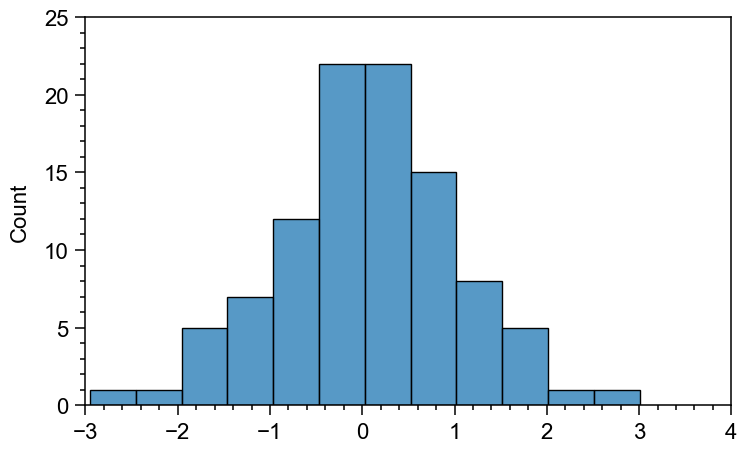

In [173]:
sns.histplot(rng.normal(size=100))
plt.show()

In [174]:
print(sp.stats.kstest(
        rng.normal(size=100),
        'norm'
        ))

KstestResult(statistic=0.09572162930996336, pvalue=0.2993294684586013, statistic_location=-0.2904875701412066, statistic_sign=-1)


In [175]:
# 연도별로 정규성 검정. 아니랜다 ㅅㅂ
for i in years:
    print(i)
    res = sp.stats.kstest(
        normalize(whole_df[whole_df['year'] == i]['no2']),
        'norm'
        )
    print(res)

2017
KstestResult(statistic=0.10600608263121886, pvalue=1.794748514695807e-21, statistic_location=-0.18033556274409504, statistic_sign=1)
2018
KstestResult(statistic=0.0859843165559731, pvalue=3.021031041608775e-14, statistic_location=-0.2780875927505496, statistic_sign=1)
2019
KstestResult(statistic=0.11086150903591552, pvalue=1.342675796916473e-23, statistic_location=-0.22647735034574654, statistic_sign=1)
2020
KstestResult(statistic=0.11676845883590115, pvalue=1.6998806831199205e-26, statistic_location=-0.05028692959781587, statistic_sign=1)
2021
KstestResult(statistic=0.12904020062220573, pvalue=2.5203934336339917e-32, statistic_location=-0.09807336062788398, statistic_sign=1)
2022
KstestResult(statistic=0.14152654923990038, pvalue=8.690376324206581e-39, statistic_location=-0.17911198145851148, statistic_sign=1)
2023
KstestResult(statistic=0.13533908059903343, pvalue=1.5847110584152087e-35, statistic_location=-0.07151326861275045, statistic_sign=1)


In [176]:
# 기간별 정규성 검정
# ㅅㅂ
for i in range(3):
    print(f'{periods_set[i]}')
    res = sp.stats.kstest(
        normalize(whole_df[whole_df['period'] == periods_set[i]]['no2']),
        sp.stats.norm.cdf
        )
    print(res)    

Before
KstestResult(statistic=0.09669097488890865, pvalue=5.58568885574927e-53, statistic_location=-0.2650495839997552, statistic_sign=1)
After
KstestResult(statistic=0.13533908059903343, pvalue=1.5847110584152087e-35, statistic_location=-0.07151326861275045, statistic_sign=1)
During
KstestResult(statistic=0.1271159600589551, pvalue=3.8189896894760407e-93, statistic_location=-0.05428220233775881, statistic_sign=1)


In [177]:
# levene test를 통한 t-test 종류 결정
for i in range(2):
    for j in range(i + 1, 3):
        print(f'{periods_set[i]} vs {periods_set[j]}')
        res = sp.stats.levene(
            whole_df[whole_df['period'] == periods_set[i]]['no2'],
            whole_df[whole_df['period'] == periods_set[j]]['no2']
            )
        print(res)

Before vs After
LeveneResult(statistic=76.22883564175565, pvalue=2.998470039351367e-18)
Before vs During
LeveneResult(statistic=202.08443507880995, pvalue=1.6033881391726354e-45)
After vs During
LeveneResult(statistic=1.088543320803665, pvalue=0.2968229356070585)


전 & 후 or 전 & 중은 분산 다름   
중 & 후는 분산 다르다고 할 수 없음

In [178]:
# t-test
for i in range(2):
    for j in range(i + 1, 3):
        print(f'{periods_set[i]} vs {periods_set[j]}')
        res = sp.stats.ttest_ind(
            whole_df[whole_df['period'] == periods_set[i]]['no2'],
            whole_df[whole_df['period'] == periods_set[j]]['no2'],
            equal_var=(periods_set[i] == 'After' and periods_set[j] == 'During')
            )
        print(res)

Before vs After
TtestResult(statistic=20.17506839689645, pvalue=1.498186044956145e-86, df=4289.225598703558)
Before vs During
TtestResult(statistic=29.079241686189302, pvalue=5.665151376479575e-180, df=12550.164658150265)
After vs During
TtestResult(statistic=0.8240102566730224, pvalue=0.40995613081574334, df=8773.0)
